### Script for reading data for Problem 4.2 (data_CountryScores.txt) in Applied Statistics 2023 problem set:

This script reads the file __"data_CountryScores.txt"__ for Problem 4.2 in the problem set of Applied Statistics 2023/24. This data files contains 133 entries in seven columns: 

* **Country**, Name of country
* **GDP**, Gross Domestic Product (per capita) of the country
* **Population Size**, of the country
* **Happiness index** of the country,
* **Economic Freedom index** of the country,
* **PressFreedom index** of the country,
* **Education index** of the country,

####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 14th of October 2023 (latest version)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy.stats import pearsonr, spearmanr
from scipy.optimize import curve_fit
from scipy.stats import shapiro, anderson


In [19]:
dataframe = pd.read_csv('data_CountryScores.csv', header=0, index_col=None)
df = dataframe
Country, GDP, PopSize, HappinessI, EconomicFreedomI, PressFreedomI, EducationI = dataframe.values.T
df

,Country,GDP,PopSize,Happiness-index,EconomicFreedom-index,PressFreedom-index,Education-index
0,Afghanistan,592.0,18356000.0,2523.0,53.0,40.19,0.414
1,Albania,5837.0,2187000.0,5117.0,65.2,30.59,0.746
2,Algeria,3638.0,27620000.0,4887.0,49.7,47.26,0.672
3,Argentina,9929.0,30799000.0,5929.0,52.7,28.99,0.855
4,Armenia,4595.0,2176000.0,5283.0,71.9,28.83,0.740
...,...,...,...,...,...,...,...
128,Uruguay,16965.0,2530000.0,6431.0,69.3,16.38,0.765
129,Venezuela,1627.0,18359000.0,4892.0,24.7,47.60,0.700
130,Vietnam,3743.0,68565000.0,5411.0,61.7,78.46,0.630
131,Zambia,1115.0,8331000.0,4073.0,50.4,38.21,0.557


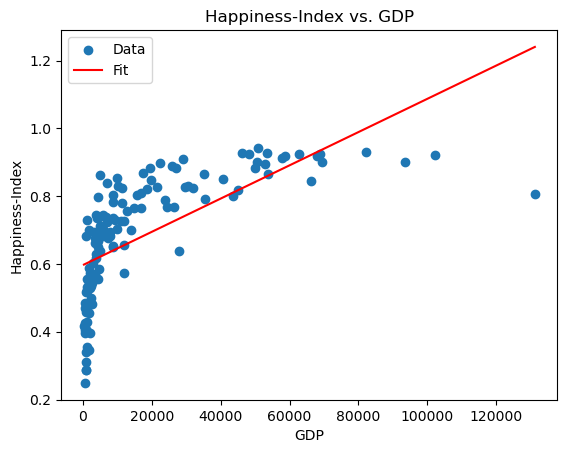

Mean GDP: 17362.045112781954
Median GDP: 6677.0
Standard Deviation of GDP: 23840.252101659422
15.87% and 84.13% Quantiles of GDP: [ 1187.226  40850.2344]
Normality Test Result for log10(PopSize): (6.962459470845413, 0.6683757968655948)
Pearson Correlation between Happiness and Education: 0.7647440306793953
Spearman Correlation between Happiness and Education: 0.8043593869327467
Estimated Uncertainty on Happiness-Index: 0.1322408867946953
Shapiro-Wilk Test Statistic: 0.9871504306793213, p-value: 0.2499414086341858


In [20]:
mean_gdp = df.iloc[:, 1].mean()
median_gdp = df.iloc[:, 1].median()
std_dev_gdp = df.iloc[:, 1].std()
quantiles_gdp = np.percentile(df.iloc[:, 1], [15.87, 84.13])

# Log-transform Population Size and check for Gaussian distribution
log_pop_size = np.log10(df.iloc[:, 2])
normality_test_result = norm.fit(log_pop_size)

# Pearson and Spearman correlations between Happiness and Education indices
pearson_corr = pearsonr(df.iloc[:, 3], df.iloc[:, 6])
spearman_corr = spearmanr(df.iloc[:, 3], df.iloc[:, 6])

# Plot Happiness-Index vs. GDP and fit the relation
def fit_function(x, a, b):
    return a * x + b

popt, pcov = curve_fit(fit_function, df.iloc[:, 1], df.iloc[:, 6])

# Plot the data points
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], label='Data')

# Plot the fit line
x_fit = np.linspace(min(df.iloc[:, 1]), max(df.iloc[:, 1]), 100)
y_fit = fit_function(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r', label='Fit')

# Calculate uncertainty on Happiness-index
residuals = df.iloc[:, 6] - fit_function(df.iloc[:, 1], *popt)
uncertainty_happiness = np.std(residuals)

# Customize the plot
plt.title('Happiness-Index vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Happiness-Index')
plt.legend()
plt.show()

# Print the results
print(f"Mean GDP: {mean_gdp}")
print(f"Median GDP: {median_gdp}")
print(f"Standard Deviation of GDP: {std_dev_gdp}")
print(f"15.87% and 84.13% Quantiles of GDP: {quantiles_gdp}")
print(f"Normality Test Result for log10(PopSize): {normality_test_result}")
print(f"Pearson Correlation between Happiness and Education: {pearson_corr[0]}")
print(f"Spearman Correlation between Happiness and Education: {spearman_corr[0]}")
print(f"Estimated Uncertainty on Happiness-Index: {uncertainty_happiness}")

stat_sw, p_sw = shapiro(log_pop_size)
print(f'Shapiro-Wilk Test Statistic: {stat_sw}, p-value: {p_sw}')

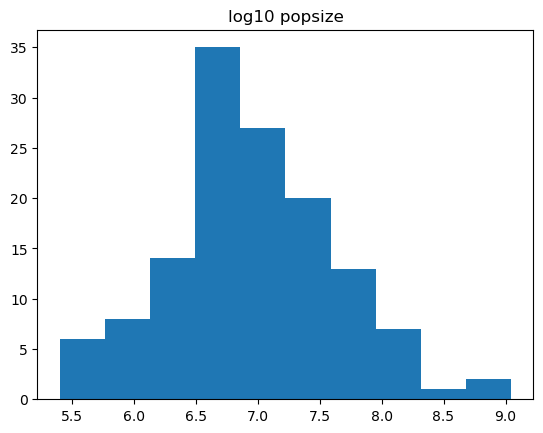

In [23]:
plt.hist(np.log10(df.iloc[:, 2]))
plt.title("log10 popsize")
plt.savefig("plots/popsize.png", bbox_inches="tight")